In [17]:
import torch


x = [[1,2], [3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()
X.shape, Y.shape


(torch.Size([4, 2]), torch.Size([4, 1]))

In [18]:
# Registor tensors into cuda if available otherwise cpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'

X = X.to(device)
Y = Y.to(device)


In [19]:
# lets create a module class for ANN module
from torch import nn

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x


In [20]:
# seed
torch.manual_seed(0)

model = MyNeuralNet().to(device)
model

MyNeuralNet(
  (input_to_hidden_layer): Linear(in_features=2, out_features=8, bias=True)
  (hidden_layer_activation): ReLU()
  (hidden_to_output_layer): Linear(in_features=8, out_features=1, bias=True)
)

In [21]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.0053,  0.3793],
        [-0.5820, -0.5204],
        [-0.2723,  0.1896],
        [-0.0140,  0.5607],
        [-0.0628,  0.1871],
        [-0.2137, -0.1390],
        [-0.6755, -0.4683],
        [-0.2915,  0.0262]], requires_grad=True)
Parameter containing:
tensor([ 0.2795,  0.4243, -0.4794, -0.3079,  0.2568,  0.5872, -0.1455,  0.5291],
       requires_grad=True)
Parameter containing:
tensor([[-0.0570,  0.0374,  0.3201, -0.3280, -0.2226, -0.0895, -0.1378,  0.3055]],
       requires_grad=True)
Parameter containing:
tensor([-0.2292], requires_grad=True)


In [22]:
loss_fn = nn.MSELoss()
_Y = model(X)

loss_value = loss_fn(_Y, Y)
print(loss_value)

tensor(132.0424, grad_fn=<MseLossBackward0>)


In [23]:
# loss(prediction_value, truth_value)
# optimizer use to update the paramters and minimize the loss

from torch.optim import SGD

optimizer = SGD(model.parameters(), lr=0.001)


In [24]:
# loss_history = []
# for _ in range(50):
#     optimizer.zero_grad()
#     loss = loss_fn(model(X), Y)
#     loss.backward()
#     optimizer.step()
#     loss_history.append(loss.detach().numpy())

In [25]:
# loss_history

In [26]:
# import matplotlib.pyplot as plt

# %matplotlib inline

# plt.plot(loss_history)
# plt.title("Loss variation over epoches")
# plt.xlabel('Epochs')
# plt.ylabel('Loss value')

In [27]:
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn

class MyDateset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

In [28]:
ds = MyDateset(x, y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

In [29]:
for (i, o) in dl:
    print(i, o)

tensor([[5., 6.],
        [7., 8.]]) tensor([[11.],
        [15.]])
tensor([[1., 2.],
        [3., 4.]]) tensor([[3.],
        [7.]])


In [30]:
# complete weights update loop
import time

loss_history = []
start = time.time()
for _ in range(50):
    for (s,p) in dl:
        optimizer.zero_grad()
        loss = loss_fn(model(s), p)
        loss.backward()
        optimizer.step()
        loss_history.append(loss.detach().numpy())

end = time.time()

print(end - start)

0.47051382064819336


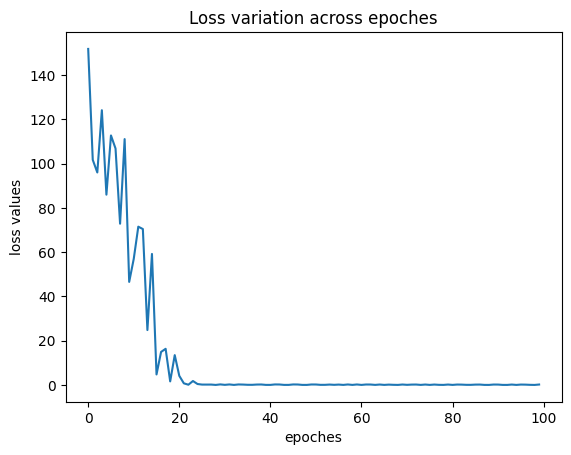

In [31]:
import matplotlib.pyplot as plt


plt.plot(loss_history)
plt.title("Loss variation across epoches")
plt.xlabel('epoches')
plt.ylabel("loss values")
plt.show()

In [40]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1629,  0.1389],
                      [-0.5250,  0.1177],
                      [ 0.3012,  0.2799],
                      [-0.0890, -0.5797],
                      [-0.1090,  0.2456],
                      [-0.2580,  0.2684],
                      [ 0.4709, -0.3692],
                      [ 0.0070,  0.2924]])),
             ('0.bias',
              tensor([ 0.0554,  0.0591,  0.0883, -0.5559,  0.0556,  0.4897,  0.6372,  0.4156])),
             ('2.weight',
              tensor([[ 0.0474,  0.1651, -0.1720, -0.2930, -0.3040,  0.3527,  0.2244, -0.2444]])),
             ('2.bias', tensor([0.1383]))])

In [41]:
torch.save(model.to('cpu').state_dict(), 'mymodel.pth')

In [42]:
model = nn.Sequential(
    nn.Linear(2,8),
    nn.ReLU(),
    nn.Linear(8,1)
).to(device)


stat_dict = torch.load('mymodel.pth')
model.load_state_dict(stat_dict)

<All keys matched successfully>

In [43]:
val = [[8,9],[10,11],[1.5,2.5]]

In [44]:
model.to(device)
model(torch.tensor(val).float().to(device))

tensor([[-1.2436],
        [-1.5913],
        [-0.1136]], grad_fn=<AddmmBackward0>)